## Practical example

## Part 1

### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression

### Load the raw data

In [2]:
raw_data = pd.read_csv("1.04.+Real-life+example.csv")

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


We would like to preidct the price of a used car depending on its specifications

## Preprcoessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Unique shows how many dummy variables are there

### Determine the variables of interest

DataFrame.drop(columns, axis) return new object with the indicated columns dropped\
axis=1 is column and axis=0 is row

In [5]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Dealing with missing values

In [6]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Pirce\
There are 25% lower than 6999\
There are 50% lower than 11500\
There are 75% lower than 21900

## Exploring the Probability Distribution Functions

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

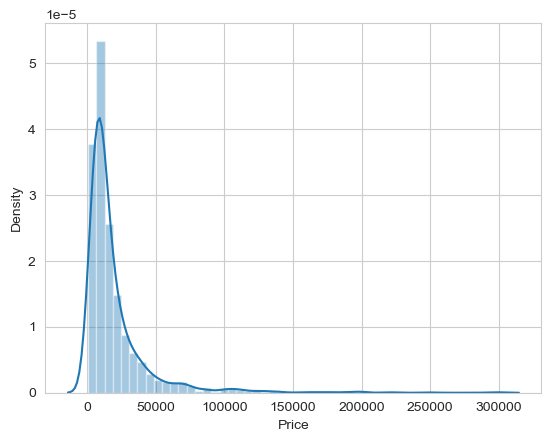

In [10]:
sns.distplot(data_no_mv['Price'])

The skewness is toward to the right and there are a lot of outliers\
outliers = observation that lie on abnormal distance from other observations in the data

To fix this, is to remove the top 1% of the observation

DataFrame.quantitle(the quantitle) returns the value at the given quantile(= np.percentile)\
I want to get the 99th percentile and keep the data below it

### Dealing with outliers

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]

data_no_mv['Price']<q: return a series of values that is less than q with the column's name, total number of values, and data type\
data_no_mv[data_no_mv['Price']<q]: pass the series to data_no_mv[] and save the true rows that the values are lower than q

In [12]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\42128\AppData\Local\Temp\ipykernel_19564\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

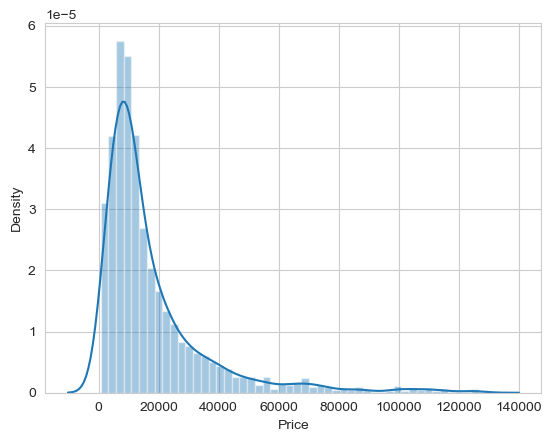

In [13]:
sns.distplot(data_1['Price'])

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\1547815769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

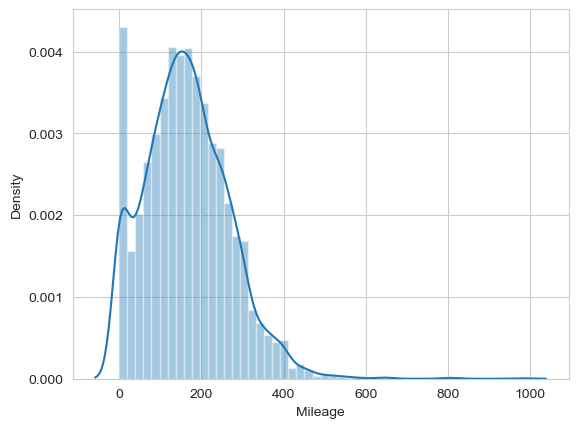

In [14]:
sns.distplot(data_1['Mileage'])

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

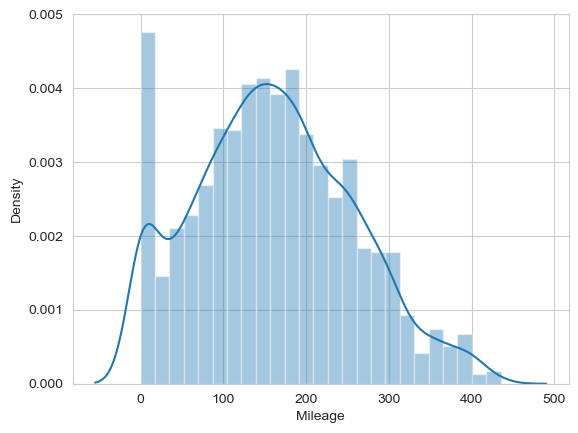

In [16]:
sns.distplot(data_2['Mileage'])

In [17]:
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [1]:
sns.displot(data_2['EngineV'])

NameError: name 'sns' is not defined

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\752563540.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

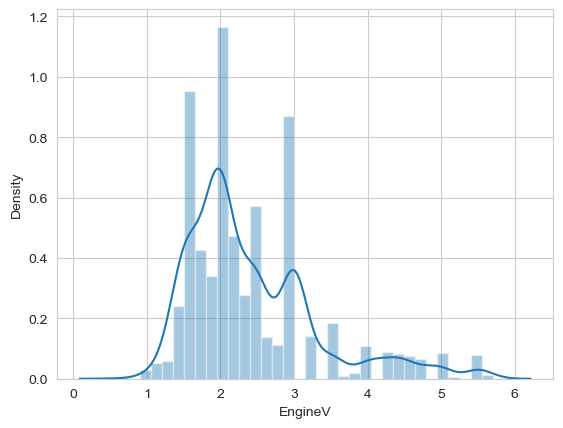

In [19]:
q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_2['EngineV'] < q]
sns.distplot(data_3['EngineV'])

In [20]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3894,3894.000000,3894,3894.000000,3894.000000,3894,3894,3894.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1483,NaN,NaN,1817,3532,NaN
mean,NaN,17823.805845,NaN,161.598100,2.417681,NaN,NaN,2006.397021
std,NaN,18919.010466,NaN,96.176488,0.896970,NaN,NaN,6.611338
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [21]:
data_3 = data_2[data_2['EngineV'] < 6.5]

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

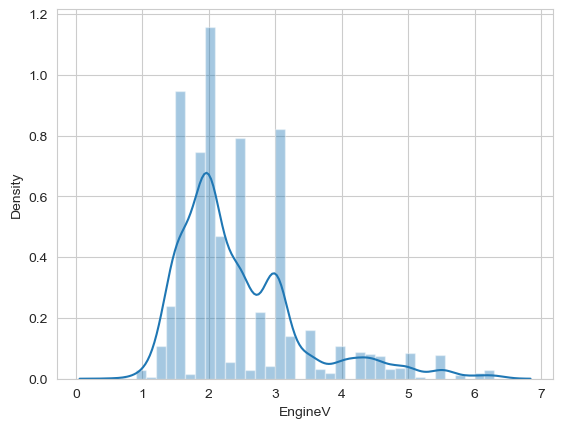

In [22]:
sns.distplot(data_3['EngineV'])

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\2525852583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

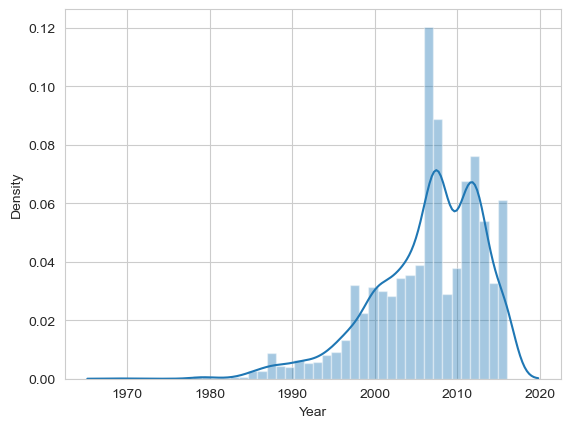

In [23]:
sns.distplot(data_3['Year'])

In [24]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

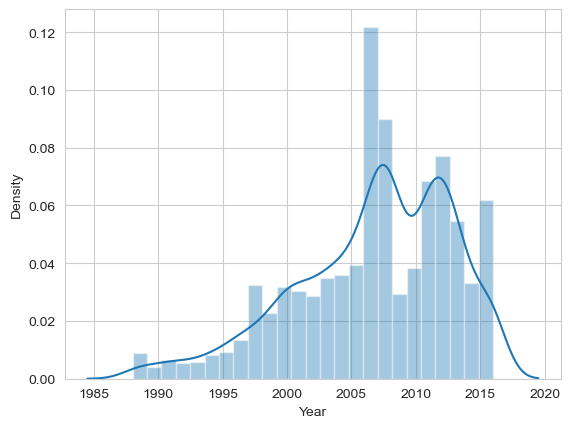

In [25]:
sns.distplot(data_4['Year'])

Currently the indices refer to all the data (including the observations we removed)\
If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6\
reset the indices as 0,1,2,3,4

In [26]:
data_cleaned = data_4.reset_index(drop=True)

In [27]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Part 2

## Checking the OLS assumption

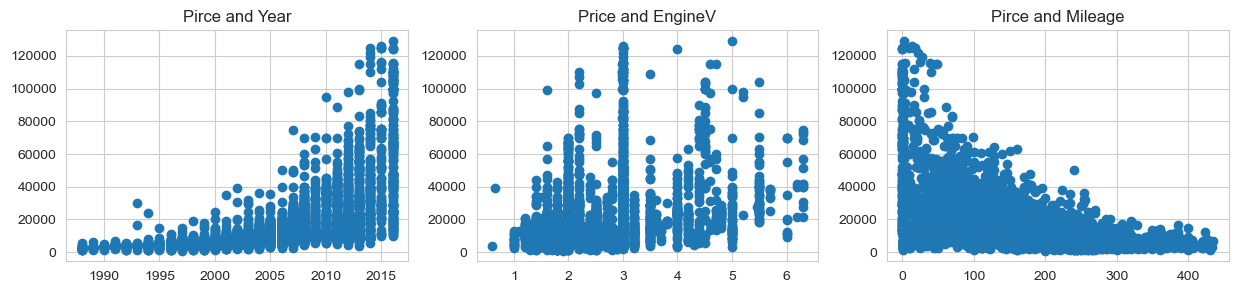

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Pirce and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Pirce and Mileage')

plt.show()

f: contain the figure object\
subplots: create a row with 3 graphs\
sharey=True: graph ony one y in the first figure; False; otherwise

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

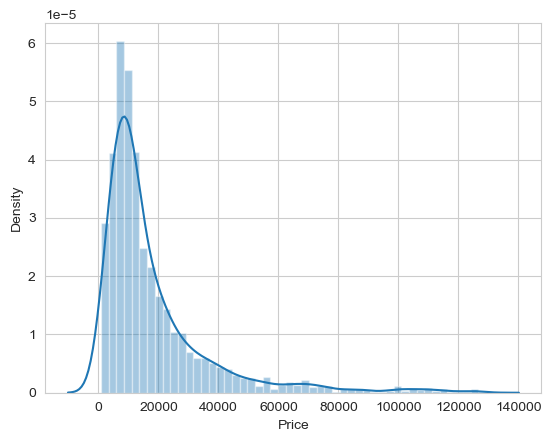

In [29]:
sns.distplot(data_cleaned['Price'])

#### Log transformations are especially useful when facing exponential relationships

### Relaxing the assumptions

np.log(x) returns the natural logarithm of a number or array of numbers

In [30]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


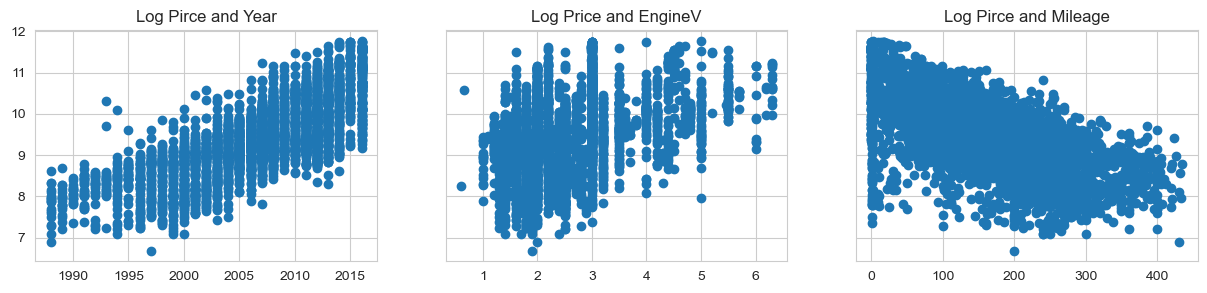

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Pirce and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Pirce and Mileage')

plt.show()

In [32]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Multicollinearity

In [33]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

One of the best ways to check for multicollinearity is through VIF (variance inflation factor)\
VIF: measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables, compared to a situation where the variable was completely uncorrelated with the other predictors

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

variance_inflation_factor(variables.values, i): calculate the VIF acoording to the column, variables.values consists of three cols and i is the index of them. variance_inflation_factor(variables.values, 0) would be the VIF of the first col

In [35]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [36]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create dummy variable

pd.get_dummies(df,[,drop_first]): spot all categorical variables and creates dummies automatically

If we have N categories for a feature, we have to create N-1 dummies

In [37]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [38]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Homework

In [39]:
data_with_dummies.shape

(3867, 18)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_drop_dummies = pd.DataFrame()
variables2 = data_with_dummies.drop(['log_price'], axis=1)
vif_drop_dummies['Features'] = variables2.columns
vif_drop_dummies['VIF'] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]

In [41]:
vif_drop_dummies

,Features,VIF
0,Mileage,4.459662
1,EngineV,7.841729
2,Brand_BMW,2.294007
3,Brand_Mercedes-Benz,2.868649
4,Brand_Mitsubishi,1.641712
5,Brand_Renault,2.086774
6,Brand_Toyota,2.162166
7,Brand_Volkswagen,2.844515
8,Body_hatch,1.464260
9,Body_other,1.534059


In [42]:
data_with_dummies2 = pd.get_dummies(data_no_multicollinearity)
variables3 = data_with_dummies2.drop(['log_price'], axis=1)

In [43]:
vif_all_dummies = pd.DataFrame()
vif_all_dummies['Features'] = variables3.columns
vif_all_dummies['VIF'] = [variance_inflation_factor(variables3.values, i) for i in range(variables3.shape[1])]
vif_all_dummies

C:\Users\42128\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,Mileage,1.266554
1,EngineV,1.575735
2,Brand_Audi,inf
3,Brand_BMW,inf
4,Brand_Mercedes-Benz,inf
5,Brand_Mitsubishi,inf
6,Brand_Renault,inf
7,Brand_Toyota,inf
8,Brand_Volkswagen,inf
9,Body_crossover,inf


This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity

In [44]:
# data_no_multicollinearity = data_no_multicollinearity.drop(['Registration'], axis=1)

## Rearrange a bit

In [45]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [46]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [47]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

### Declare the inputs and the targets

In [48]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Feature Selection

In [49]:
from sklearn.feature_selection import f_regression
p_value = f_regression(inputs, targets)
p_value = p_value[1].round(3)
table = pd.DataFrame(data=inputs.columns, columns=['Features'])
table['P-value'] = p_value
table

,Features,P-value
0,Mileage,0.000
1,EngineV,0.000
2,Brand_BMW,0.000
3,Brand_Mercedes-Benz,0.000
4,Brand_Mitsubishi,0.000
5,Brand_Renault,0.000
6,Brand_Toyota,0.000
7,Brand_Volkswagen,0.000
8,Body_hatch,0.000
9,Body_other,0.034


We should drop the engine Type_Other because its p-vaue is greater than 0.05

In [50]:
inputs = inputs.drop(["Engine Type_Other"], axis=1)
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3863,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3864,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3865,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,1,1


## Adjusted R-squared

In [51]:
reg_R = LinearRegression()
reg_R.fit(inputs, targets)
reg_R.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [52]:
r2 = reg_R.score(inputs, targets)
r2

0.7501294759992209

In [53]:
n = inputs.shape[0]
p = inputs.shape[1]

In [54]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7490910530423345

### Scale the data

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [56]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.41493781,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.41493781,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ...,  2.40999971,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.41493781,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.41493781,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.41493781,
        -0.75037043,  0.32137366]])

## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [58]:
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [59]:
yhat = reg.predict(x_train)

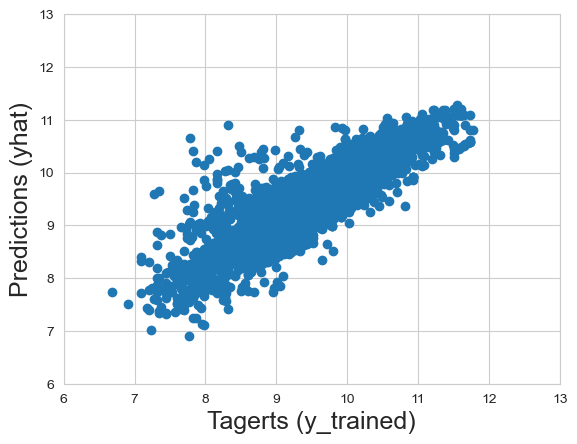

In [60]:
plt.scatter(y_train, yhat)
plt.xlabel("Tagerts (y_trained)", size=18)
plt.ylabel("Predictions (yhat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The best possible match between y_trained_price (targets) and yhat_price which is the predictions\
The results seem all data points close to the 45 degree lines

Another check is the Residuals Plot

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\750212808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - yhat)


Text(0.5, 1.0, 'Residuals PDF')

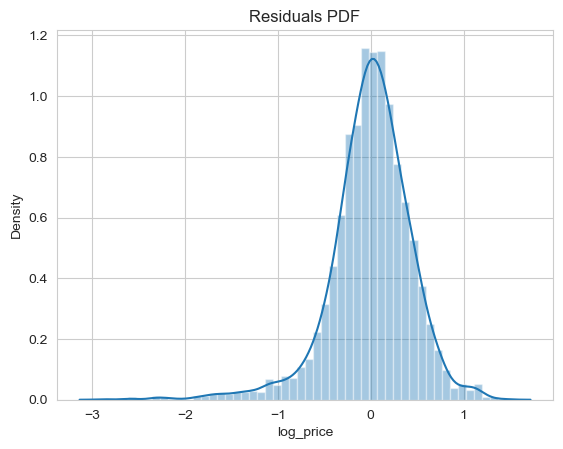

In [61]:
sns.distplot(y_train - yhat)
plt.title("Residuals PDF")

The result is quite normal and zero mean, but there is a longer tail and a slightly longer head in the graph which means there are certain observations for which (y_train - yhat) is much lower than the mean or a much higher price is predicted than is observed

In [62]:
reg.score(x_train, y_train)

0.7434342364025954

## Finding weights and bias

In [63]:
reg.intercept_

9.414507103563091

In [64]:
reg.coef_

array([-0.44773683,  0.20810356,  0.01572927,  0.01461804, -0.14138068,
       -0.17875931, -0.06230631, -0.08833292, -0.15034408, -0.1044603 ,
       -0.20625764, -0.13091751, -0.16874364, -0.11500956, -0.13746947,
        0.32053826])

In [65]:
reg_summary = pd.DataFrame(data=inputs.columns, columns=['Features'])

In [66]:
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.447737
1,EngineV,0.208104
2,Brand_BMW,0.015729
3,Brand_Mercedes-Benz,0.014618
4,Brand_Mitsubishi,-0.141381
5,Brand_Renault,-0.178759
6,Brand_Toyota,-0.062306
7,Brand_Volkswagen,-0.088333
8,Body_hatch,-0.150344
9,Body_other,-0.104460


### Weights intrepretation (Continuous variables)\
1.A positive wieght shows that as a feature increases in value, so do the log_price and 'Price' respectively\
2.A negative wieght shows that as a feature increases in value, log_price and 'Price' decrease

(negative)As you drove more, the mileage would be increased and then the price would be decreased\
(positive)If the car has a greater engine volumne, the price would be increased

In [67]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Weights intrepretation (Dummies variables)\
When Audi is 1, other brands are 0\
1.A positive weight shows that the respective category(Brand) is more expensive than the benchmark(Audi)\
2.A negative weight shows that respective category(Brand) is less expensive than the bechmark(Audi)

## Homework

In [68]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [69]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [70]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

## Testing

In [71]:
yhat_test = reg.predict(x_test)

plt.scatter(x,y,[,alpha]): creates a scatter plot\
alpha: specifies the opacity

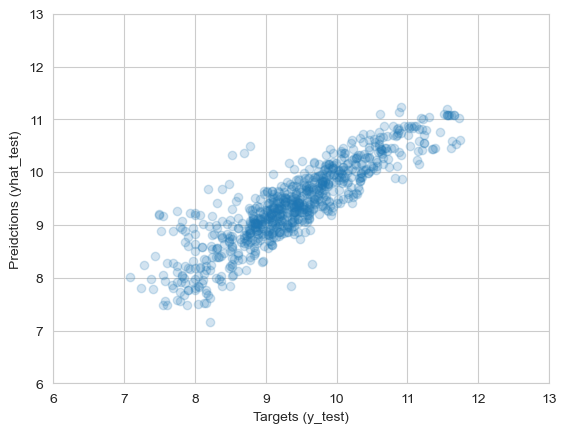

In [72]:
plt.scatter(y_test,yhat_test, alpha=0.2)
plt.xlabel("Targets (y_test)")
plt.ylabel("Preidctions (yhat_test)")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The more saturated the color, the higher the concentration

The price is in logarithm, so we need to transform the log price back to original price

exp(ln(x)) = |x|\
log(exp(x)) = x

In [73]:
df_prediction_performance = pd.DataFrame(np.exp(yhat_test), columns=['Prediction'])
df_prediction_performance.head()

,Prediction
0,10505.454232
1,3512.083746
2,7564.751525
3,7425.293501
4,11162.394473


In [74]:
df_prediction_performance['Target'] = np.exp(y_test)
df_prediction_performance

,Prediction,Target
0,10505.454232,NaN
1,3512.083746,7900.0
2,7564.751525,NaN
3,7425.293501,NaN
4,11162.394473,NaN
...,...,...
769,29450.283785,6950.0
770,10734.032528,NaN
771,13695.224850,NaN
772,27506.885403,NaN


In [75]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [76]:
df_prediction_performance['Target'] = np.exp(y_test)
df_prediction_performance

,Prediction,Target
0,10505.454232,2300.0
1,3512.083746,2800.0
2,7564.751525,2500.0
3,7425.293501,6400.0
4,11162.394473,9150.0
...,...,...
769,29450.283785,29500.0
770,10734.032528,9600.0
771,13695.224850,18300.0
772,27506.885403,68500.0


#### The main reason is that the OLS framework is based on minimizing SSE and that is achieved minimizing the sum of squared residual, as a result examining trhe residuals is the same as examining the heart of the algorithm

In [77]:
df_prediction_performance['Residual'] = df_prediction_performance['Target'] - df_prediction_performance['Prediction']
df_prediction_performance.head()

,Prediction,Target,Residual
0,10505.454232,2300.0,-8205.454232
1,3512.083746,2800.0,-712.083746
2,7564.751525,2500.0,-5064.751525
3,7425.293501,6400.0,-1025.293501
4,11162.394473,9150.0,-2012.394473


In [78]:
df_prediction_performance['Difference%'] = np.abs(df_prediction_performance['Residual']/df_prediction_performance['Target']*100)

In [79]:
df_prediction_performance.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15890.530965,18165.817106,2275.286141,36.031679
std,13083.258919,19967.858908,10918.314618,54.429732
min,1284.734337,1200.000000,-29412.183206,0.015597
25%,7414.123402,6900.000000,-1993.927125,11.918369
50%,11504.656061,11600.000000,198.005005,23.122974
75%,20024.319771,20500.000000,3205.257331,39.614014
max,76268.888649,126000.000000,85912.474747,512.572635


In [80]:
pd.options.display.max_rows = 999
pd.set_option("display.float_format", lambda x: '%.2f' % x)
df_prediction_performance.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
742,16996.35,16999.00,2.65,0.02
369,3097.77,3100.00,2.23,0.07
47,26025.29,25999.00,-26.29,0.10
643,9910.26,9900.00,-10.26,0.10
698,30550.49,30500.00,-50.49,0.17
769,29450.28,29500.00,49.72,0.17
648,21209.34,21335.00,125.66,0.59
714,23136.49,22999.00,-137.49,0.60
61,7348.14,7300.00,-48.14,0.66
533,24174.18,24000.00,-174.18,0.73


## Regression without transformed Price

In [81]:
target2 = np.exp(data_preprocessed['log_price'])

In [82]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(inputs, target2, test_size=0.2, random_state=365)

In [83]:
reg2 = LinearRegression()
reg2.fit(x_train2, y_train2)
y_predict = reg2.predict(x_train2)

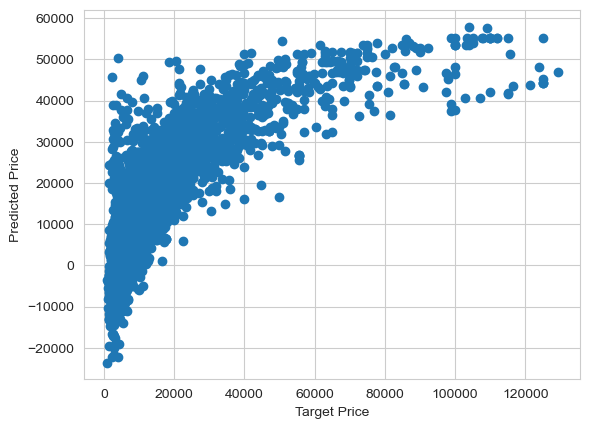

In [84]:
plt.scatter(y_train2, y_predict)
plt.xlabel('Target Price')
plt.ylabel('Predicted Price')
plt.show()

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\1981197188.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train2 - y_predict)


<Axes: xlabel='log_price', ylabel='Density'>

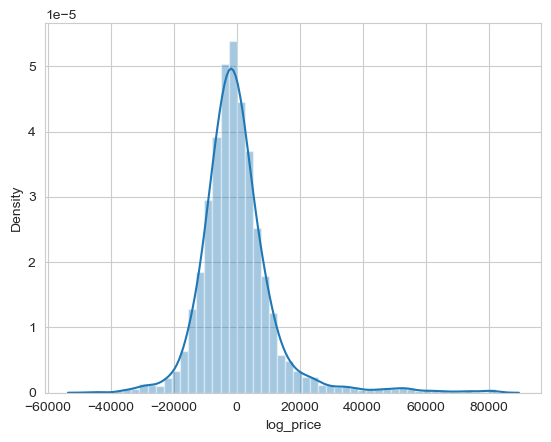

In [85]:
sns.distplot(y_train2 - y_predict)

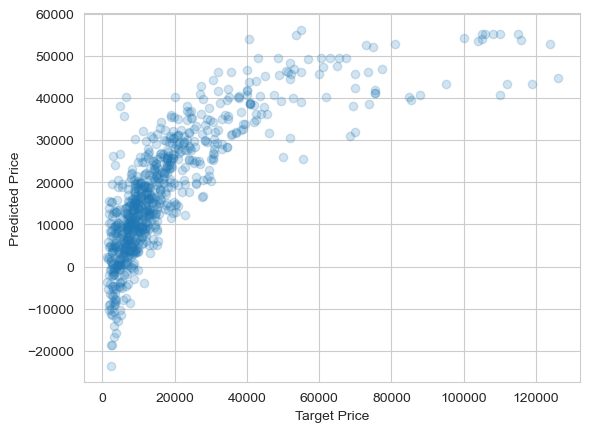

In [86]:
y_predict_test = reg2.predict(x_test2)

plt.scatter(y_test2, y_predict_test, alpha=0.2)
plt.xlabel('Target Price')
plt.ylabel('Predicted Price')
plt.show()

C:\Users\42128\AppData\Local\Temp\ipykernel_19564\570194201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test2 - y_predict_test)


<Axes: xlabel='log_price', ylabel='Density'>

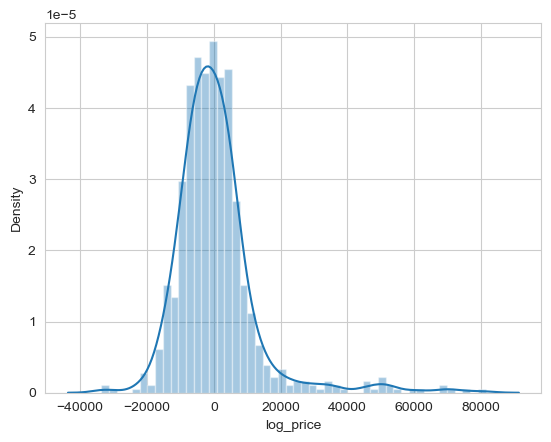

In [87]:
sns.distplot(y_test2 - y_predict_test)